In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

## Part A 

In [2]:
@njit
def sum2(a):
    sh = a.shape[0]
    b =  np.zeros_like(a)
    b[0] = a[0]
    for i in range(1,sh):
        b[i] = b[i-1] + a[i]

    return b

In [3]:
n_steps = 10000
walks = np.array([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]])
randoms = np.random.randint(0,6,n_steps)
moves = walks[randoms]
x_t = sum2(moves)

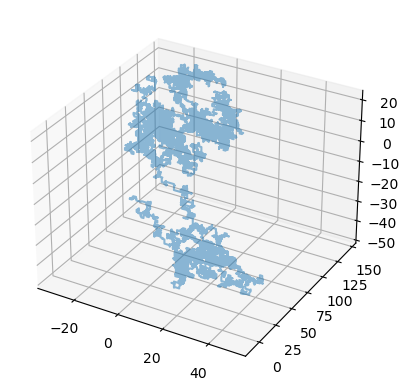

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.plot(x_t[:,0], x_t[:,1], x_t[:,2],alpha=0.5)

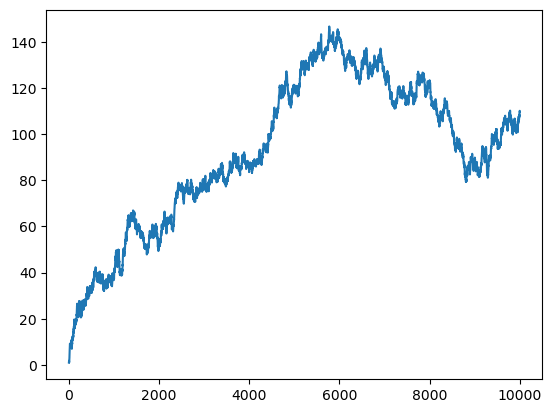

In [5]:
plt.plot(np.arange(n_steps),np.linalg.norm(x_t,axis=1))

## part B

In [6]:
randomTheta = np.pi * np.random.random(n_steps) - np.pi/2
randomPhi = 2*np.pi * np.random.random(n_steps) 
moves2 = np.array([[np.sin(randomTheta)*np.cos(randomPhi)],[np.sin(randomTheta)*np.sin(randomPhi)],[np.sin(randomTheta)]]) 
moves2 = np.transpose(moves2[:,0,:])
x_t2 = sum2(moves2)

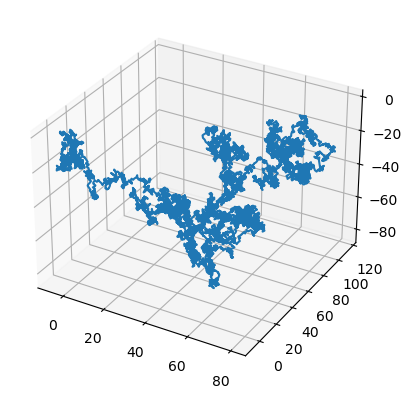

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')



ax.plot(x_t2[:,0], x_t2[:,1], x_t2[:,2])

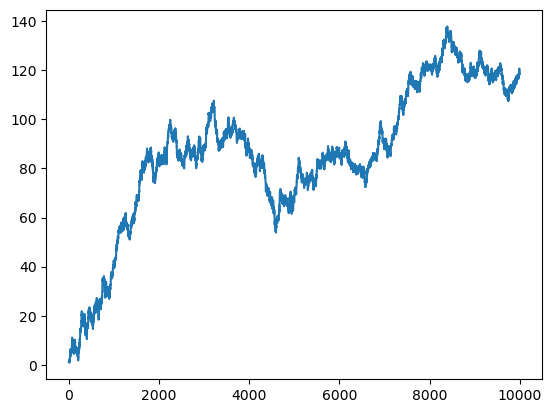

In [8]:
plt.plot(np.arange(n_steps),np.linalg.norm(x_t2,axis=1))

## part C

In [9]:
iterations = 10000
ansamble1 =  np.zeros((n_steps,3,iterations))
ansamble2 =  np.zeros((n_steps,3,iterations))

In [10]:
for i in range(iterations):
    randoms = np.random.randint(0,6,n_steps)
    moves = walks[randoms]
    x_t = sum2(moves)


    randomTheta = np.pi * np.random.random(n_steps) - np.pi/2
    randomPhi = 2*np.pi * np.random.random(n_steps) 
    moves2 = np.array([[np.cos(randomTheta)*np.cos(randomPhi)],[np.cos(randomTheta)*np.sin(randomPhi)],[np.sin(randomTheta)]]) 
    moves2 = np.transpose(moves2[:,0,:])
    x_t2 = sum2(moves2)

    ansamble1[:,:,i] = x_t
    ansamble2[:,:,i] = x_t2

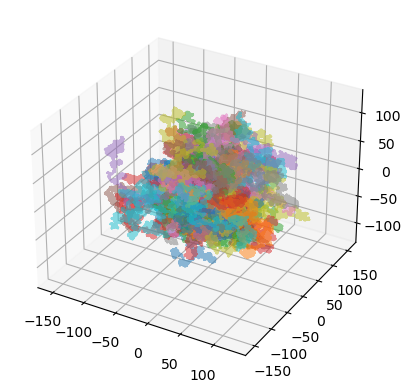

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(100):
    ax.plot(ansamble1[:,0,i], ansamble1[:,1,i], ansamble1[:,2,i],alpha=0.5)

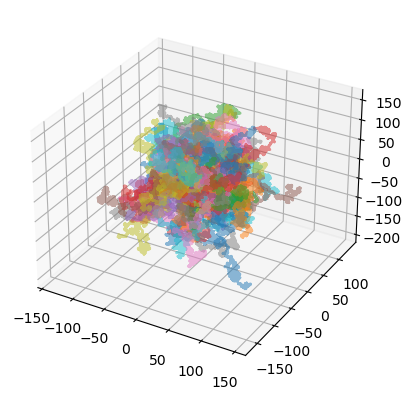

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(100):
    ax.plot(ansamble2[:,0,i], ansamble2[:,1,i], ansamble2[:,2,i],alpha=0.5)

(array([5.000e+01, 2.270e+02, 4.670e+02, 7.270e+02, 1.001e+03, 1.134e+03,
        1.180e+03, 1.110e+03, 1.036e+03, 8.340e+02, 6.560e+02, 5.170e+02,
        3.720e+02, 2.790e+02, 1.710e+02, 1.030e+02, 6.100e+01, 2.900e+01,
        1.700e+01, 1.500e+01, 6.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  4.65568729,  21.19504173,  37.73439618,  54.27375062,
         70.81310507,  87.35245951, 103.89181396, 120.4311684 ,
        136.97052285, 153.50987729, 170.04923174, 186.58858619,
        203.12794063, 219.66729508, 236.20664952, 252.74600397,
        269.28535841, 285.82471286, 302.3640673 , 318.90342175,
        335.44277619, 351.98213064, 368.52148508, 385.06083953,
        401.60019397, 418.13954842, 434.67890287, 451.21825731,
        467.75761176, 484.2969662 , 500.83632065]),
 <BarContainer object of 30 artists>)

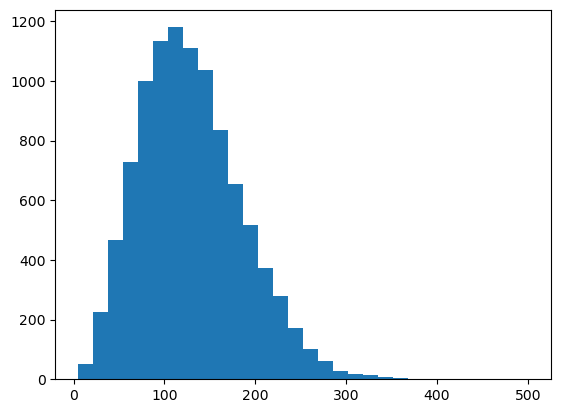

In [13]:
diff = np.linalg.norm(ansamble1 - ansamble2,axis=1)
plt.hist(diff[-1],bins=30)

## Part D

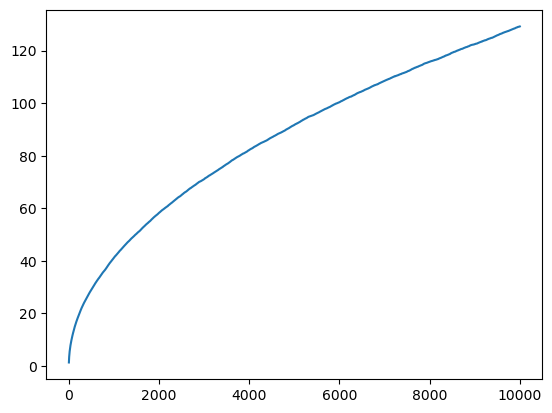

In [14]:
plt.plot(np.arange(n_steps),np.mean(diff,axis=1))

/tmp/ipykernel_5283/1374340889.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.arange(n_steps)),np.log(np.mean(diff,axis=1)))


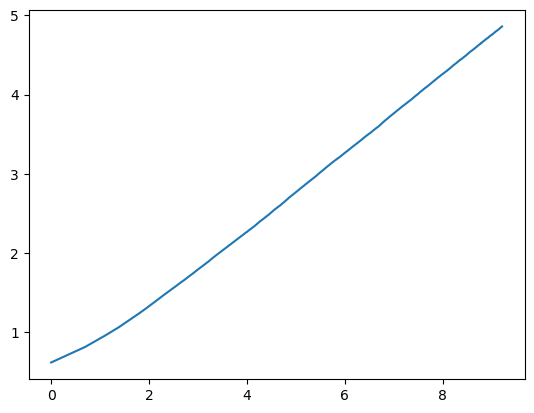

In [15]:
plt.plot(np.log(np.arange(n_steps)),np.log(np.mean(diff,axis=1)))

## Part E

In [16]:
a =1 
beta =1 
def getP(f):
    return (1 +  np.tanh(beta*f*a))/2

nSteps = 1000
ansambels = 100000
fs = np.linspace(0,1,20)
l_f_data  = np.zeros(20)

In [17]:
for j in range(fs.shape[0]):
    f = fs[j]
    L_data = np.zeros(ansambels)
    p = getP(f)

    for i in range(ansambels):
        walks = 2 *(np.random.uniform(0,1,nSteps) < p) - 1
        L = np.sum(walks)
        L_data[i] = L

    print(j)

    l_f_data[j] = np.mean(L_data)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


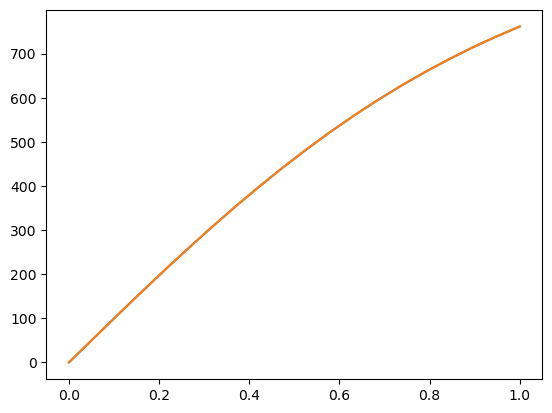

In [19]:
plt.plot(fs,l_f_data)
plt.plot(fs,nSteps*np.tanh(fs))

## Part F.1

In [20]:
n_steps = 1000 
walks = np.array([[1,0,0],
                  [-1,0,0],
                  [0,1,0],
                  [0,-1,0],
                  [0,0,1],
                  [0,0,-1]]).reshape(6,3,1)   

walks = np.repeat(walks,n_steps,axis = 2)


def getP2(f):
    return (1 +  np.tanh(beta*f*a))/6


ansambels = 10000
fs2 = np.linspace(0,3,20)
l_f_data  = np.zeros(20)


In [21]:
for j in range(fs.shape[0]):
    f = fs[j]
    L_data = np.zeros(ansambels)
    p = getP2(f)

    for i in range(ansambels):

        randoms = np.random.uniform(0,1,n_steps)

        steps = np.zeros((3,n_steps))

        steps = np.where(randoms <= 1 ,walks[5],steps)

        steps = np.where(randoms <= 2/3 + p,walks[4],steps)

        steps = np.where(randoms <= 2/3,walks[3],steps)

        steps = np.where(randoms <= 1/2,walks[2],steps)

        steps = np.where(randoms <= 1/3,walks[1],steps)

        steps = np.where(randoms <= 1/6,walks[0],steps)

        L = np.linalg.norm(np.sum(steps,axis=1))
        L_data[i] = L

    print(j)

    l_f_data[j] = np.mean(L_data)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


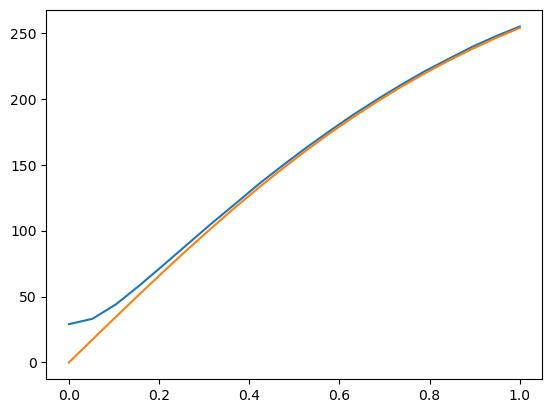

In [22]:
plt.plot(fs,l_f_data)
plt.plot(fs,n_steps * np.tanh(fs)/3)

## Part F.2

In [25]:
num_thetas = 100_00
n_steps = 1000

In [24]:
@njit
def getProbs(f):
    return np.exp(-f*np.cos(np.arange(num_thetas)*np.pi/num_thetas))/np.sum(np.exp(-f*np.cos(np.arange(num_thetas)*np.pi/num_thetas)))

In [26]:
fs = np.linspace(0,10,30)

In [27]:
f_l_data_3 = np.zeros(fs.shape[0])
iterations = 1000

for j in range(fs.shape[0]):
    ansamble =  np.zeros((iterations,3))
    f = fs[j]
    for i in range(iterations):

        probs = getProbs(f)

        randomPhi = 2*np.pi * np.random.random(n_steps) 
        randomTheta = np.random.choice(np.arange(num_thetas)*np.pi/num_thetas,n_steps,p=probs)

        moves2 = np.array([[np.sin(randomTheta)*np.cos(randomPhi)],[np.sin(randomTheta)*np.sin(randomPhi)],[np.cos(randomTheta)]]) 
        moves2 = np.transpose(moves2[:,0,:])
        x_t = np.sum(moves2,axis=0)

        ansamble[i] = x_t

    f_l_data_3[j] = np.linalg.norm(np.mean(ansamble,axis=0))
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


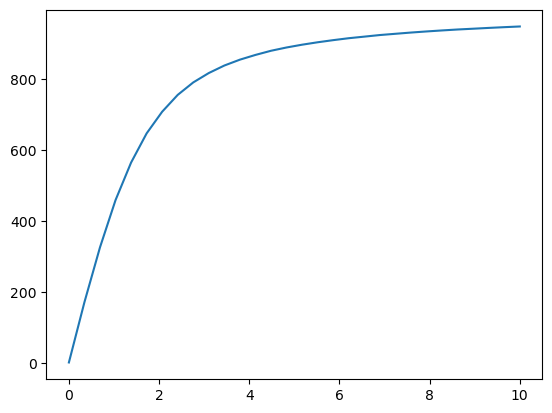

In [32]:
plt.plot(fs,f_l_data_3)